In [25]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import svm, datasets
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [26]:
#loading train and test data
train_data=pd.read_excel(r"D:\Extra\datascience MIT ass\trainingdata.xlsx")
test_data=pd.read_excel(r"D:\Extra\datascience MIT ass\testingdata.xlsx")


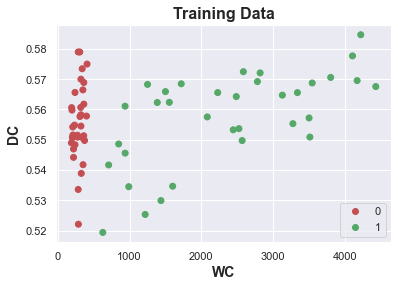

In [170]:
#ploting training data; red points belong to category 0 and vice versa
colours = ListedColormap(['r','g'])
classes = ['0',"1"]
scatter = plt.scatter(train_data.iloc[:,1],train_data.iloc[:,2],c=train_data.iloc[:,3], cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('WC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('DC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Training Data',fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.grid("True")

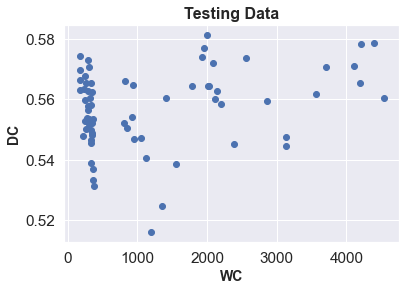

In [52]:
#ploting training data
scatter = plt.scatter(test_data.iloc[:,1],test_data.iloc[:,2])
plt.xlabel('WC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('DC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Testing Data',fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.grid("True")

# SVM

In [29]:
train_df=train_data.sample(n=40) #randomly choosen 40 samples from the training dataset 
X=train_df.iloc[:,1:3]
y=train_df.iloc[:,3]
svc = svm.SVC(kernel='linear', C=1,gamma="auto").fit(X, y) #Initializing the model for support vector machine model

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,18.0,22.0,1.0,40.0,40.0


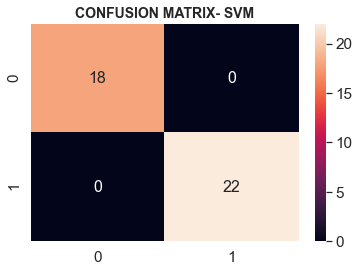

In [35]:
expected = train_df.iloc[:,3] #expected result before training
predicted = svc.predict(train_df.iloc[:,1:3]) #predicted result after training
report=metrics.classification_report(expected, predicted,output_dict=True) # printing complete training report
df = pd.DataFrame(report)
display(df)
cm=metrics.confusion_matrix(expected, predicted) #printing confusion marix
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title('CONFUSION MATRIX- SVM',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()


,Firm,WC,DC,Category
61,62,306.790,0.570650,0
57,58,317.079,0.560538,0
24,25,3711.358,0.570857,1
12,13,4400.268,0.578645,1
67,68,298.008,0.562856,0
55,56,281.666,0.553904,0
51,52,4538.527,0.560383,1
41,42,257.212,0.565379,0
19,20,286.696,0.572919,0
14,15,243.554,0.559966,0


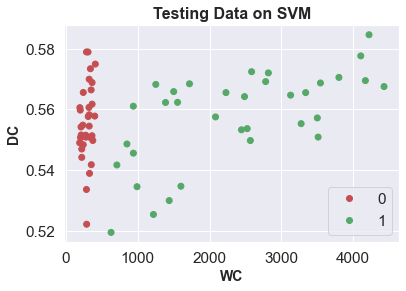

In [31]:
#Testing plot
#ploting testing data; red points belong to category 0 and vice versa
test_df=test_data.sample(n=40) #randomly choosen 40 samples from the training dataset
predicted = svc.predict(test_df.iloc[:,1:3])
test_df["Category"]=predicted
colours = ListedColormap(['r','g'])
classes = ['0',"1"]
scatter = plt.scatter(train_data.iloc[:,1],train_data.iloc[:,2],c=train_data.iloc[:,3], cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('WC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('DC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Testing Data on SVM',fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.grid("True")
display(test_df)
test_df.to_excel("D:\Extra\datascience MIT ass\svm_testdata.xlsx",index=False)

# NAIVE BAYES

In [32]:
model = GaussianNB() #Initializing Gaussian Naive bayes model
train_df=train_data.sample(n=40)  #randomly choosen 40 samples from the training dataset 
model.fit(train_df.iloc[:,1:3], train_df.iloc[:,3]) #Applying model to training dataset

GaussianNB()

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,18.0,22.0,1.0,40.0,40.0


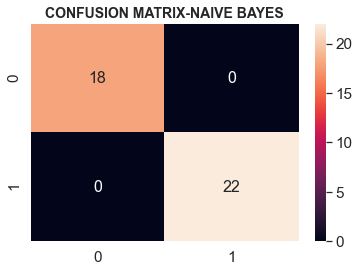

In [36]:
expected = train_df.iloc[:,3] #expected result before training
predicted = model.predict(train_df.iloc[:,1:3]) #predicted result after training
report=metrics.classification_report(expected, predicted,output_dict=True) # printing complete training report
df = pd.DataFrame(report)
display(df)
#displaying confusion matrix
cm=metrics.confusion_matrix(expected, predicted) #printing confusion marix
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title('CONFUSION MATRIX-NAIVE BAYES',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

,Firm,WC,DC,Category
23,24,1781.718,0.564307,1
30,31,932.500,0.564721,1
47,48,1058.649,0.547290,1
36,37,367.325,0.533232,0
46,47,294.644,0.556574,0
25,26,2030.189,0.564332,1
10,11,1193.951,0.515996,1
67,68,298.008,0.562856,0
33,34,2112.875,0.560262,1
2,3,4197.206,0.565368,1


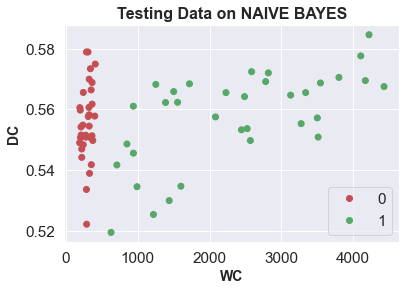

In [53]:
#Testing plot
#ploting testing data; red points belong to category 0 and vice versa
test_df=test_data.sample(n=40) #randomly choosen 40 samples from the training dataset
predicted = model.predict(test_df.iloc[:,1:3])
test_df["Category"]=predicted
colours = ListedColormap(['r','g'])
classes = ['0',"1"]
scatter = plt.scatter(train_data.iloc[:,1],train_data.iloc[:,2],c=train_data.iloc[:,3], cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('WC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('DC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Testing Data on NAIVE BAYES',fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.grid("True")
display(test_df)
# test_df.to_excel(r"D:\Extra\datascience MIT ass\naive_testdata.xlsx",index=False)

# DECISION TREE

In [48]:
clf = tree.DecisionTreeClassifier() #creating decision tree model
train_df=train_data.sample(n=40) #randomly choosen 40 samples from the training dataset 
clf = clf.fit(train_df.iloc[:,1:3], train_df.iloc[:,3]) #applying model to the training data


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,20.0,20.0,1.0,40.0,40.0


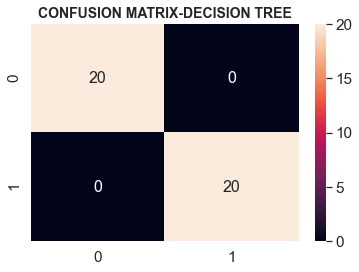

In [49]:
expected = train_df.iloc[:,3] #expected result before training
predicted = clf.predict(train_df.iloc[:,1:3]) #predicted result after training
report=metrics.classification_report(expected, predicted,output_dict=True) # printing complete training report
df = pd.DataFrame(report)
display(df)
#displaying confusion matrix
cm=metrics.confusion_matrix(expected, predicted) #printing confusion marix
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title('CONFUSION MATRIX-DECISION TREE',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

,Firm,WC,DC,Category
13,14,266.396,0.550131,0
6,7,3128.736,0.547596,1
55,56,281.666,0.553904,0
41,42,257.212,0.565379,0
47,48,1058.649,0.547290,1
48,49,956.021,0.546774,1
16,17,362.479,0.553563,0
24,25,3711.358,0.570857,1
31,32,924.554,0.554162,1
40,41,378.899,0.531441,0


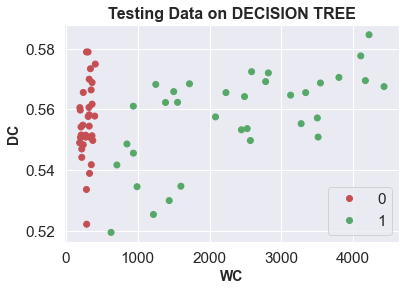

In [54]:
#Testing plot
#ploting testing data; red points belong to category 0 and vice versa
test_df=test_data.sample(n=40) #randomly choosen 40 samples from the training dataset
predicted = clf.predict(test_df.iloc[:,1:3])
test_df["Category"]=predicted
colours = ListedColormap(['r','g'])
classes = ['0',"1"]
scatter = plt.scatter(train_data.iloc[:,1],train_data.iloc[:,2],c=train_data.iloc[:,3], cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('WC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('DC',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Testing Data on DECISION TREE',fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.grid("True")
display(test_df)
# test_df.to_excel(r"D:\Extra\datascience MIT ass\decision_testdata.xlsx",index=False)